# UN Emissions Data
*April 5, 2022*

Let's take a look at some historical emissions data made available [here](https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv), at Our World in Data. We'll start by taking a look at how emissions compare to 1990 levels in G7 countries (a reproduction of [this graphic here](https://twitter.com/JensWieting/status/1510995242928934921)).

First, import pandas.

In [1]:
import pandas as pd

Next, we read in the data and drop rows that are completely empty.

In [2]:
raw = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

raw = raw.dropna(how="all")

Now, on to the analysis!

## G7 countries, total emissions compared with 1990.

We start by filtering and swapping the index to the year. We're going to take a look at the total_ghg column here.

In [5]:
data = (raw
          .loc[raw["country"].isin(["data", "United States", "Japan", "Italy", "France", "Germany", "United Kingdom"]), ["year", "country", "total_ghg"]]
          .set_index("year")
          .dropna()
          )

data.head()

,country,total_ghg
year,,
1990,France,477.92
1991,France,502.72
1992,France,487.97
1993,France,469.18
1994,France,463.44


Now, we pivot so it's a bit more readable.

In [6]:
data = data.pivot(columns="country", values="total_ghg")

data.head()

country,France,Germany,Italy,Japan,United Kingdom,United States
year,,,,,,
1990,477.92,1109.28,456.75,1109.37,746.40,5543.47
1991,502.72,1079.69,454.34,1123.86,761.64,5501.92
1992,487.97,1032.01,451.12,1137.15,739.51,5583.80
1993,469.18,1024.31,444.81,1129.63,722.61,5691.26
1994,463.44,1011.41,439.52,1186.79,711.75,5782.20


Now, we calculate the % difference since 1990 but using a loop to go through our columns and replace them with the calculated value.

In [7]:
for idx, col in data.iloc[1, :].items():
    data[idx] = (data[idx] - data.loc[1990, idx]) / data.loc[1990,idx] * 100
    
data

country,France,Germany,Italy,Japan,United Kingdom,United States
year,,,,,,
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991,5.189153,-2.667496,-0.527641,1.306147,2.041801,-0.749531
1992,2.102862,-6.965780,-1.232622,2.504124,-0.923098,0.727523
1993,-1.828758,-7.659924,-2.614122,1.826262,-3.187299,2.666020
1994,-3.029796,-8.822840,-3.772304,6.978736,-4.642283,4.306508
1995,-1.201038,-9.419624,1.698960,8.336263,-5.874866,5.419530
1996,2.722213,-6.883744,0.877942,9.607255,-3.177921,8.427032
1997,0.640275,-10.309390,1.705528,8.512940,-6.073151,12.898058
1998,3.996485,-12.682100,4.179529,4.262780,-6.562165,13.535385


This is ready to visualize!

<AxesSubplot:xlabel='year'>

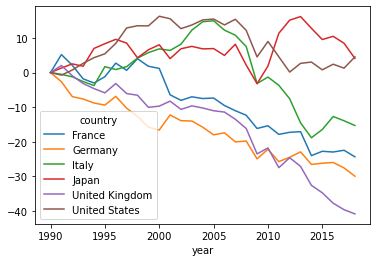

In [8]:
data.plot()

\-30\-